In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read csv files:
long = pd.read_csv('long.csv',index_col=0)
short = pd.read_csv('short.csv',index_col=0)

In [7]:
# Reset index to 0,1,2,...
long = long.reset_index(drop=True)
short = short.reset_index(drop=True)

In [8]:
# Manually add some of the missing stock tickers.
long['about'][356] = 'STMP'
short['about'][[1284,1990,7452]] = ['INTC','TWTR','FRPT'] 

In [9]:
# Remove those rows with missing values in both 'about' and 'includes'.
# Remove duplicate.
long_clean = long.loc[long.about.notnull()|long.includes.notnull()]
short_clean = short.loc[short.about.notnull()|short.includes.notnull()]
long_clean = long_clean.drop_duplicates()
short_clean = short_clean.drop_duplicates()

In [10]:
import datetime

In [11]:
# Convert publish_time from string to datetime object,
# set as index and sort.
long_clean.loc[:,'publish_time'] = pd.to_datetime(long_clean.publish_time.apply(lambda s: s[:10]),format="%Y-%m-%d")
short_clean.loc[:,'publish_time'] = pd.to_datetime(short_clean.publish_time.apply(lambda s: s[:10]),format="%Y-%m-%d")
long_clean = long_clean.set_index('publish_time').sort_values('publish_time')
short_clean = short_clean.set_index('publish_time').sort_values('publish_time')

In [12]:
# Inspect size of our data
print(long_clean.shape)
print(short_clean.shape)

(6969, 5)
(10354, 5)


In [14]:
from collections import Counter

In [15]:
# Get most commonly concerned stocks to long:
popular_long_count = Counter(long_clean.about)
del popular_long_count[np.nan]
popular_long_count.most_common(10)

[('FB', 102),
 ('AAPL', 100),
 ('GE', 71),
 ('MU', 67),
 ('TSLA', 63),
 ('AMD', 62),
 ('BABA', 43),
 ('AMZN', 38),
 ('GOOG||GOOGL', 37),
 ('MSFT', 36)]

In [16]:
# Get most commonly concerned stocks to short:
popular_short_count = Counter(short_clean.about)
del popular_short_count[np.nan]
popular_short_count.most_common(10)

[('TSLA', 1085),
 ('HLF', 336),
 ('AAPL', 182),
 ('AMZN', 174),
 ('NFLX', 172),
 ('BB', 129),
 ('TWTR', 97),
 ('BHC', 77),
 ('AMD', 76),
 ('DRYS', 74)]

In [17]:
# Note that AAPL, AMD, AMZN, TSLA are on both lists!
# We will invest these later.

In [18]:
# Get most common authors to write long ideas:
long_author = Counter(long_clean.author)
long_author.most_common(10)

[('Stephen Simpson, CFA', 177),
 ('BioSci Capital Partners', 152),
 ('Terry Chrisomalis', 127),
 ('Stone Fox Capital', 121),
 ('Shareholders Unite', 118),
 ('Jonathan Faison', 106),
 ('Josh Rudnik', 105),
 ('Quad 7 Capital', 96),
 ('Gary Alexander', 87),
 ('Long Player', 86)]

In [19]:
# Get most common authors to write short ideas:
short_author = Counter(short_clean.author)
short_author.most_common(10)

[('Shock Exchange', 305),
 ('Paulo Santos', 283),
 ('Bill Maurer', 269),
 ('Josh Arnold', 266),
 ('Orange Peel Investments', 174),
 ('Anton Wahlman', 169),
 ('Quoth the Raven', 158),
 ('Michael Blair', 135),
 ('Don Dion', 134),
 ('Montana Skeptic', 131)]

In [20]:
# For the most common authors to write long ideas, how many short ideas
# have they posted?
for author,_ in long_author.most_common(10):
    print("%s : %d" %(author,short_author[author]))

Stephen Simpson, CFA : 2
BioSci Capital Partners : 1
Terry Chrisomalis : 22
Stone Fox Capital : 91
Shareholders Unite : 6
Jonathan Faison : 0
Josh Rudnik : 7
Quad 7 Capital : 6
Gary Alexander : 2
Long Player : 12


In [21]:
# For the most common authors to write short ideas, how many long ideas
# have they posted?
for author,_ in short_author.most_common(10):
    print("%s : %d" %(author,long_author[author]))

Shock Exchange : 1
Paulo Santos : 7
Bill Maurer : 26
Josh Arnold : 36
Orange Peel Investments : 0
Anton Wahlman : 12
Quoth the Raven : 4
Michael Blair : 5
Don Dion : 0
Montana Skeptic : 0


In [22]:
no_of_long_authors = len(set(long_clean.author))
no_of_short_authors = len(set(short_clean.author))
no_of_inter = len(set(long_clean.author).intersection(set(short_clean.author)))
print(no_of_long_authors)
print(no_of_short_authors)
print(no_of_inter)

1247
1885
401


In [23]:
# Looking at a particular stock: 
# Note: There is no entry for this stock in short ideas.
long_clean.loc[long_clean.about=='NVAX']

,about,author,includes,summary,title
publish_time,,,,,
2018-01-11,NVAX,John Engle,RILY,Novavax shares had a big bounce up during the ...,Novavax: What's Behind The Latest Movement?
2018-01-11,NVAX,Stone Fox Capital,NaN,Novavax released promising data points for a P...,Novavax: Is This Time Different?
2018-03-22,NVAX,John Engle,NaN,Novavax reported its Q4 earnings on March 14.\...,Novavax: New RSV Vaccine Timeline Raises Cash ...
2018-04-12,NVAX,John Engle,NaN,"On April 11, Novavax announced its intention t...",Novavax Pulls The Trigger On A Stock Offering:...
2018-05-02,NVAX,MedTechBio,NaN,Shares of Novavax have been oversold.\r\r\nNan...,The Time Is Right To Buy Novavax
2018-05-23,NVAX,John Engle,PFE||SNY,"Novavax reported Q1 earnings on May 9, posting...",Novavax: All Eyes On Q1 2019
2018-05-30,NVAX,Stone Fox Capital,NaN,Novavax issued another 35 million shares in Ap...,Novavax: More Of The Same


In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('ggplot')

In [25]:
import re

In [26]:
from nltk.corpus import stopwords

In [27]:
# Change all words to lower_case.
long_clean['title'] = long_clean['title'].apply(lambda t: " ".join(word.lower() for word in t.strip().split()))
# Remove noncharacter/nonspace.
long_clean['title'] = long_clean['title'].apply(lambda t: re.sub('[^\w\s]','', t))
# Remove extra spaces.
long_clean['title'] = long_clean['title'].apply(lambda t: re.sub('\s+',' ', t.strip()))
# Now each title will be a string of words separated by exactly one space.

In [28]:
# Replace np.nan by empty string.
long_clean['summary'] = long_clean['summary'].apply(lambda t: '' if pd.isnull(t) else t)
# Change all words to lower_case.
long_clean['summary'] = long_clean['summary'].apply(lambda t: " ".join(word.lower() for word in t.strip().split()))
# Remove noncharacter/nonspace.
long_clean['summary'] = long_clean['summary'].apply(lambda t: re.sub('[^\w\s]','', t))
# Remove extra spaces.
long_clean['summary'] = long_clean['summary'].apply(lambda t: re.sub('\s+',' ', t.strip()))
# Now each summary will be a string of words separated by exactly one space.

In [29]:
# Do the same thing for short ideas:
short_clean['title'] = short_clean['title'].apply(lambda t: " ".join(word.lower() for word in t.strip().split())) # change to lower_case
short_clean['title'] = short_clean['title'].apply(lambda t: re.sub('[^\w\s]','', t)) # remove punctuations 
short_clean['title'] = short_clean['title'].apply(lambda t: re.sub('\s+',' ', t.strip()))
short_clean['summary'] = short_clean['summary'].apply(lambda t: '' if pd.isnull(t) else t)
short_clean['summary'] = short_clean['summary'].apply(lambda t: " ".join(word.lower() for word in t.strip().split())) # change to lower_case
short_clean['summary'] = short_clean['summary'].apply(lambda t: re.sub('[^\w\s]','', t)) # remove punctuations 
short_clean['summary'] = short_clean['summary'].apply(lambda t: re.sub('\s+',' ', t.strip()))

In [31]:
# Modify stop words according to the needs: 
stop_long = stopwords.words('english')
stop_long.extend(['stock','market','2018','price','company','investors','companys','years','apple','share','companies','shares','one','amazon','tesla','model','business','facebook','alibaba','year'])
# Transform the list into set. Could improve speed a bit?
stop_long = set(stop_long)
# Want to see some conjunctions.
stop_long = stop_long-{'but'}

In [32]:
# Concatenate title with summary, separated by a space.
long_cloud_vec = long_clean['title']+' '+long_clean['summary']
# Remove all the stop words defined in stop_long
long_cloud_vec = long_cloud_vec.apply(lambda x: " ".join(x for x in x.split() if x not in stop_long))
# We are going to generate a wordcloud using a very long string.
# So concatenate the list of strings to a single long string.
long_cloud_str = ' '.join(long_cloud_vec)

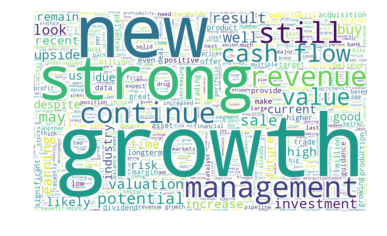

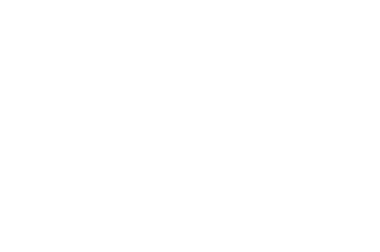

In [33]:
# Set width, height so we will get more information and higher resolution?
wc_long = WordCloud(background_color="white", max_words=2000,width=1000,height=600)
# generate word cloud
wc_long.generate(long_cloud_str)
plt.imshow(wc_long, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [34]:
# Remark: We could also generate wordcloud from frequencies!
# Simply use Counter from collections.
# However, generating wordcloud this way will also capture
# additional information, like 2-grams with high frequencies,
# that a simple Counter cannot capture.
# In the end, it is a personal preference in this case.

In [35]:
# Doing the same thing for short ideas:
stop_short = stopwords.words('english')
stop_short.extend(['stock','market','2018','price','company','investors','companys','years','tesla','share','shares','teslas','apple','business','year','going','one','model','make','herbalife','solarcity','amazon','companies','dont'])
stop_short = set(stop_short)
stop_short = stop_short - {'but','not'}

In [36]:
short_cloud_vec = short_clean['title']+' '+short_clean['summary']
short_cloud_vec = short_cloud_vec.apply(lambda x: " ".join(x for x in x.split() if x not in stop_short))
short_cloud_str = ' '.join(short_cloud_vec)

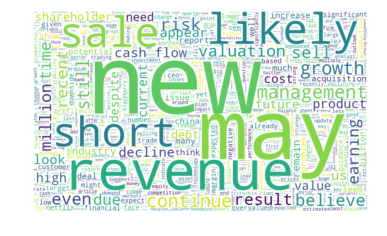

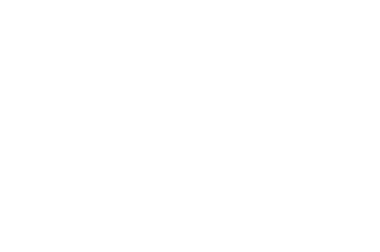

In [37]:
wc_short = WordCloud(background_color="white", max_words=2000,width=1000,height=600)
# generate word cloud
wc_short.generate(short_cloud_str)
plt.imshow(wc_short, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

In [38]:
# Remark: Note that there are many 'neutral' words appeared in both
# wordclouds.
# I think wordclouds along are not indicative of sentiments.
# It is more sequentially related! So more powerful models are required.
# I don't have time to dig into RNN now but maybe later.

In [39]:
# Now let's look at AAPL,AMD,AMZN,TSLA. These are the most common stocks
# mentioned in both long and short ideas! 
# How good/valid are these ideas?

In [40]:
# These historical price data are obtained from Alpha Vantage via API calls.
# See: https://www.alphavantage.co/documentation/
aapl = pd.read_csv('daily_adjusted_AAPL.csv')
amd = pd.read_csv('daily_adjusted_AMD.csv')
amzn = pd.read_csv('daily_adjusted_AMZN.csv')
tsla = pd.read_csv('daily_adjusted_TSLA.csv')

In [41]:
# Transform string to datetime object:
aapl.loc[:,'timestamp'] = pd.to_datetime(aapl.timestamp,format="%Y-%m-%d")
# Set timestamp as index:
aapl = aapl.set_index('timestamp')
# Reverse the order so that the older dates are at the top:
aapl = aapl[::-1]

# Do the same for the other three:
amd.loc[:,'timestamp'] = pd.to_datetime(amd.timestamp,format="%Y-%m-%d")
amd = amd.set_index('timestamp')
amd = amd[::-1]
amzn.loc[:,'timestamp'] = pd.to_datetime(amzn.timestamp,format="%Y-%m-%d")
amzn = amzn.set_index('timestamp')
amzn = amzn[::-1]
tsla.loc[:,'timestamp'] = pd.to_datetime(tsla.timestamp,format="%Y-%m-%d")
tsla = tsla.set_index('timestamp')
tsla = tsla[::-1]

In [42]:
# Count how many times each of these 4 stocks was mentioned in each day:
long_count = long_clean.loc[long_clean.about.isin(['AAPL','AMD','AMZN','TSLA'])].groupby(['publish_time','about'])[['author']].count()
short_count = short_clean.loc[short_clean.about.isin(['AAPL','AMD','AMZN','TSLA'])].groupby(['publish_time','about'])[['author']].count()

In [50]:
# Create a dataframe with proper size and filled with np.nan first:
long_flat = pd.DataFrame(index=long_count.index.get_level_values(0),columns=['AAPL','AMD','AMZN','TSLA'])

# Fill in the count of each stock at each day with a proper scaling
# so that the plot will be prettier later.
# Note the syntax for working with multiindexed dataframe!
for day,tempdf in long_count.groupby(level=0):
    for ticker in tempdf.index.get_level_values(1):
        if ticker == 'AMD':
            # Note: tempdf.loc[day,ticker] is a pandas.series.
            # We only need the number so we just take the first
            # (and only) element.
            long_flat.loc[day][[ticker]] = tempdf.loc[day,ticker][0]*5
        elif ticker == 'AMZN':
            long_flat.loc[day][[ticker]] = tempdf.loc[day,ticker][0]*500
        else:
            long_flat.loc[day][[ticker]] = tempdf.loc[day,ticker][0]*20

# There will be np.nan. But we don't care as the plot function will
# ignore nan's.

In [51]:
# Do the same for short ideas:
short_flat = pd.DataFrame(index=short_count.index.get_level_values(0),columns=['AAPL','AMD','AMZN','TSLA'])

for day,tempdf in short_count.groupby(level=0):
    for ticker in tempdf.index.get_level_values(1):
        if ticker == 'AMD':
            short_flat.loc[day][[ticker]] = -tempdf.loc[day,ticker][0]*5
        elif ticker == 'AMZN':
            short_flat.loc[day][[ticker]] = -tempdf.loc[day,ticker][0]*500
        else:
            short_flat.loc[day][[ticker]] = -tempdf.loc[day,ticker][0]*20

In [52]:
total_flat = pd.merge(long_flat, short_flat, how='outer', on ='publish_time')

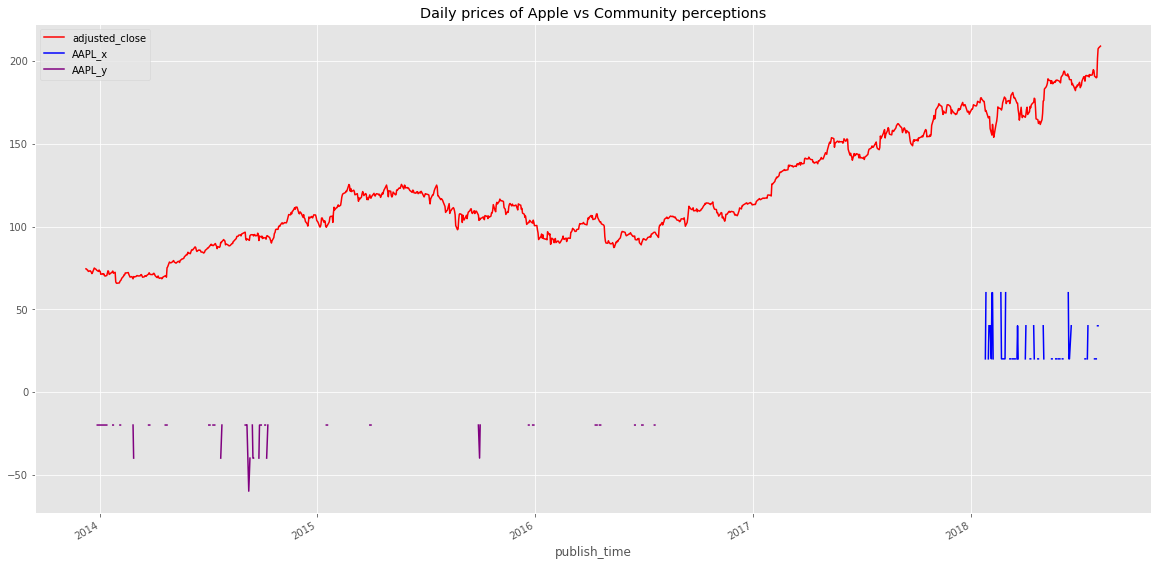

In [61]:
# Plot the timeseries!
ax = aapl.loc[aapl.index>='2013-12-09'][['adjusted_close']].plot(color = 'red', title = 'Daily prices of Apple vs Community perceptions')

# In the same plot!
total_flat[['AAPL_x','AAPL_y']].plot(color=['blue','purple'],ax=ax)

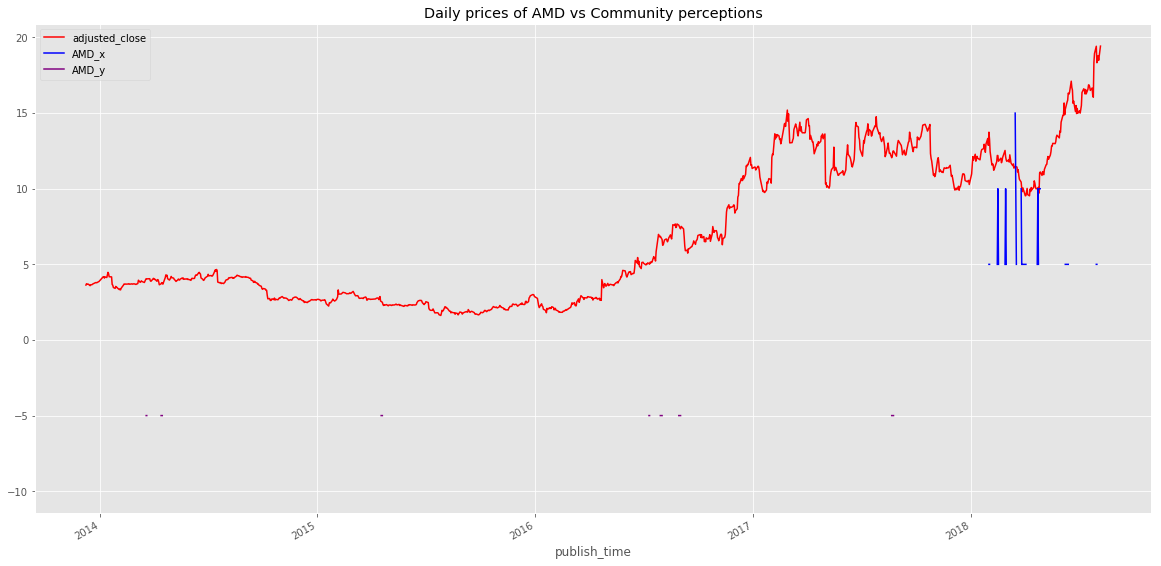

In [70]:
# Plot the timeseries!
ax = amd.loc[amd.index>='2013-12-09'][['adjusted_close']].plot(color = 'red', title = 'Daily prices of AMD vs Community perceptions')

# In the same plot!
total_flat[['AMD_x','AMD_y']].plot(color=['blue','purple'],ax=ax)

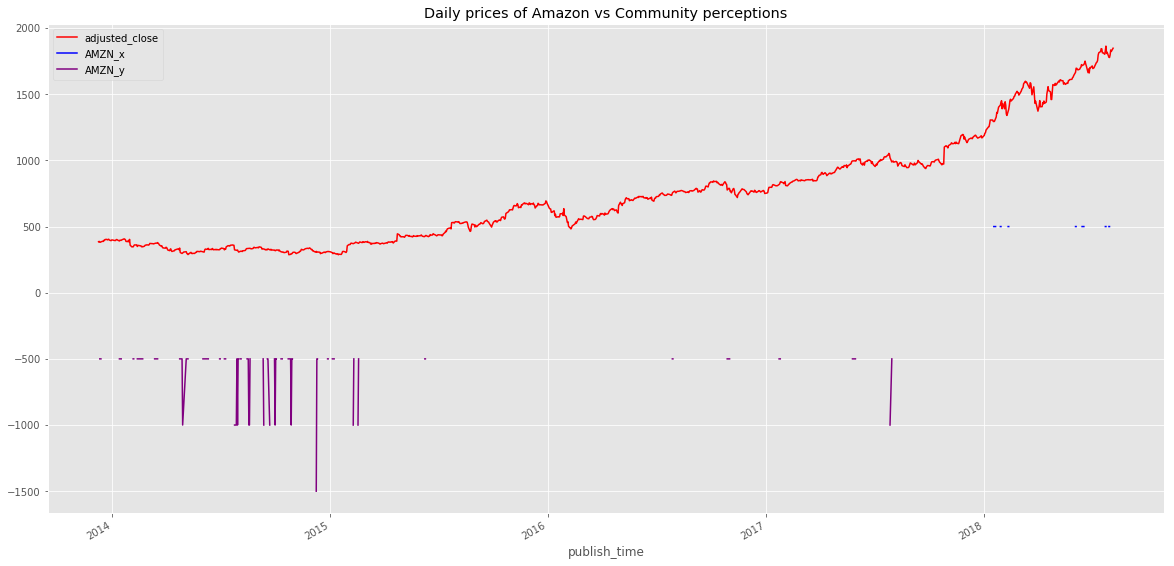

In [71]:
# Plot the timeseries!
ax = amzn.loc[amzn.index>='2013-12-09'][['adjusted_close']].plot(color = 'red', title = 'Daily prices of Amazon vs Community perceptions')

# In the same plot!
total_flat[['AMZN_x','AMZN_y']].plot(color=['blue','purple'],ax=ax)

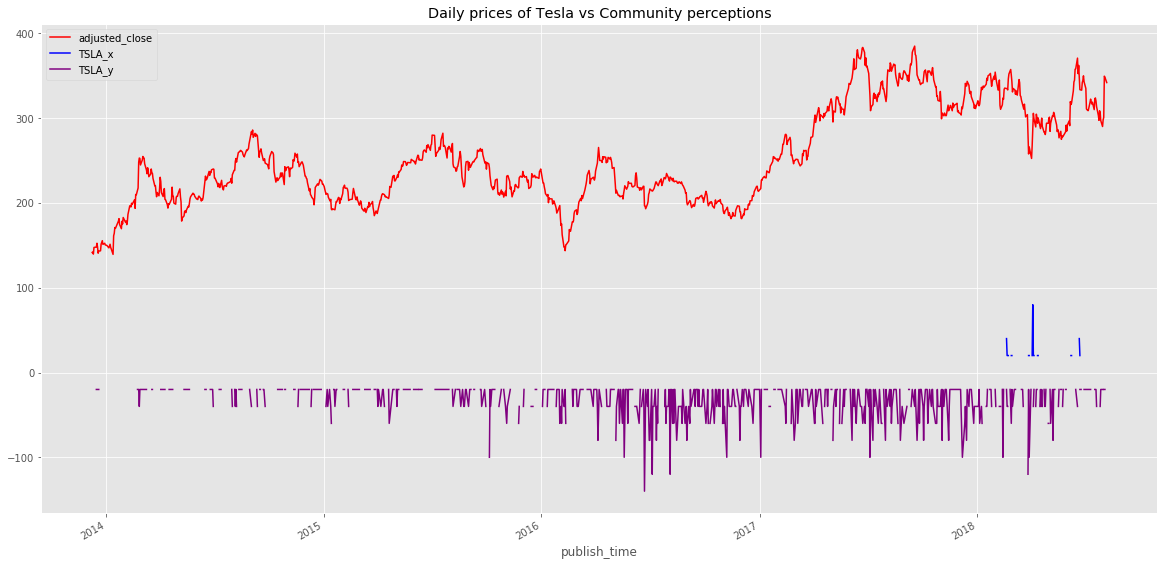

In [72]:
# Plot the timeseries!
ax = tsla.loc[tsla.index>='2013-12-09'][['adjusted_close']].plot(color = 'red', title = 'Daily prices of Tesla vs Community perceptions')

# In the same plot!
total_flat[['TSLA_x','TSLA_y']].plot(color=['blue','purple'],ax=ax)